# 梯度上升法解决主成分分析问题

目标：求w，使得

$$f(X) = \frac{1}{m}\sum_{i=1}^m(X_1^{(i)}w_1 + X_2^{(i)}w_2 + \ldots + X_n^{(i)}w_n)^2$$

最大

**为了使用梯度上升法，求梯度：**

$$\nabla f = \begin{pmatrix}
\frac{\partial f}{\partial w_1} \\\\
\frac{\partial f}{\partial w_2} \\\\
\vdots \\\\
\frac{\partial f}{\partial w_n} \\\\
\end{pmatrix} = 
\frac{2}{m} \begin{pmatrix}
\sum_{i=1}^m(X_1^{(i)}w_1 + X_2^{(i)}w_2 + \ldots + X_n^{(i)}w_n)X_1^{(i)} \\\\
\sum_{i=1}^m(X_1^{(i)}w_1 + X_2^{(i)}w_2 + \ldots + X_n^{(i)}w_n)X_2^{(i)} \\\\
\vdots \\\\
\sum_{i=1}^m(X_1^{(i)}w_1 + X_2^{(i)}w_2 + \ldots + X_n^{(i)}w_n)X_n^{(i)} \\\\
\end{pmatrix} = \begin{pmatrix}
\sum_{i=1}^m(X^{(i)}w)X_1^{(i)} \\\\
\sum_{i=1}^m(X^{(i)}w)X_2^{(i)} \\\\
\vdots \\\\
\sum_{i=1}^m(X^{(i)}w)X_n^{(i)} \\\\
\end{pmatrix}$$

$$\nabla f = \frac{2}{m} \cdot X^T (Xw)$$

## 使用梯度上升法求解主成分分析

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

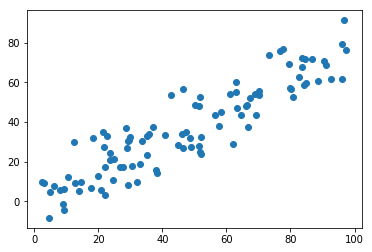

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

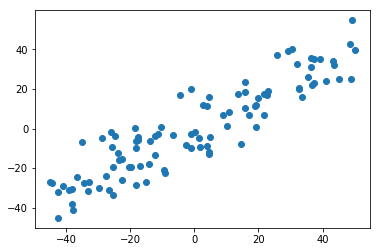

In [5]:
X_demean = demean(X)
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [6]:
def f(w, X):
    return np.sum(X.dot(w)**2) / len(X)

In [7]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [8]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [9]:
def direction(w):
    return w / np.linalg.norm(w)
def gradient_ascent(df, x, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, x)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1： 每次求一个单位方向
        if(abs(f(w,x) - f(last_w,x)) < epsilon):
            break
            
        cur_iter += 1
    return w

In [10]:
initial_w = np.random.random(X.shape[1]) # 注意2： 不能用0向量开始
initial_w

array([0.77234493, 0.5761085 ])

In [11]:
eta = 0.001
# 注意3 不能使用StandardScaler标准化数据
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.77107371, 0.63674589])

In [12]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.77107371, 0.63674589])

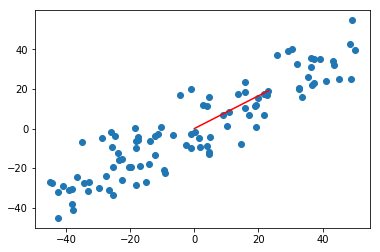

In [13]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='r')
plt.show()

### 求前 n 个主成分

求出第一主成分后，如何求出下一个主成分？
- 数据进行改变，将数据在第一个主成分上的分量去掉

$$X^{(i)} \cdot w = ||X_{project}^{(i)}||$$

$$X_{project}^{(i)} = ||X_{project}^{(i)} \cdot w||$$

$$X^{`(i)} = X^{(i)} - X_{project}^{(i)}$$

- 在新数据上求第一主成分

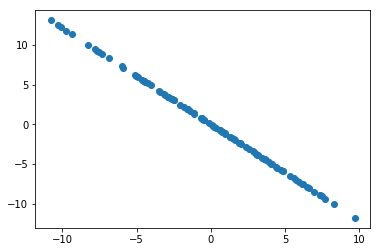

In [42]:
X2 = X_demean - X_demean.dot(w).reshape(-1,1) * w
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [46]:
w2 = gradient_ascent(df_math,X2,initial_w,eta)

In [47]:
w2

array([ 0.63676586, -0.77105723])

In [48]:
w.dot(w2)

2.5895357688154874e-05

In [49]:
def first_n_components(n, X, eta=0.01, n_iters=1e4,epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = gradient_ascent(df_math, X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1) * w
        
    return res

In [50]:
first_n_components(2, X)

[array([0.77107329, 0.63674641]), array([ 0.63675008, -0.77107025])]